In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline

In [2]:
#adding datset 
train = pd.read_csv("C:\\Users\\piyus\\Desktop\\Titanic\\train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#Dataset summary for a better understanding of the dataset 
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


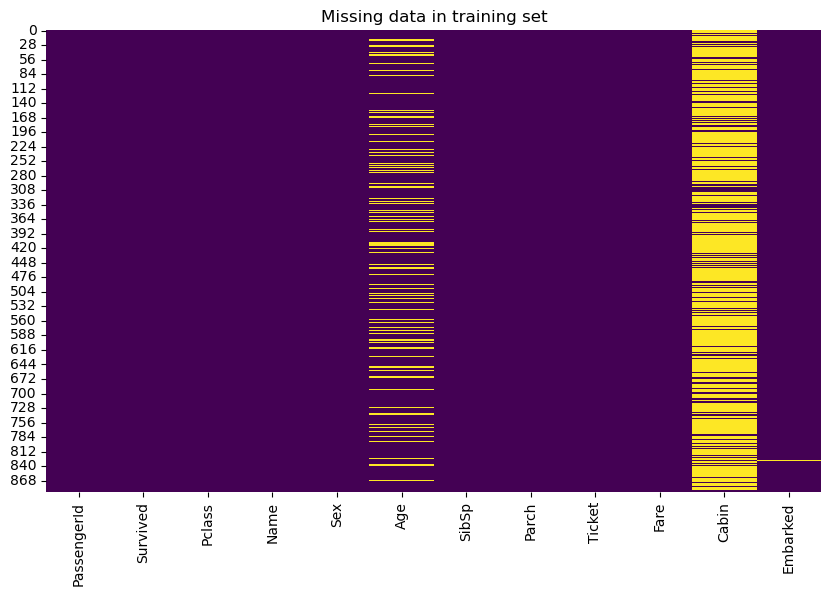

In [6]:
#heatmap for missiing values 
plt.figure(figsize=(10,6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing data in training set')
plt.show()

In [7]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

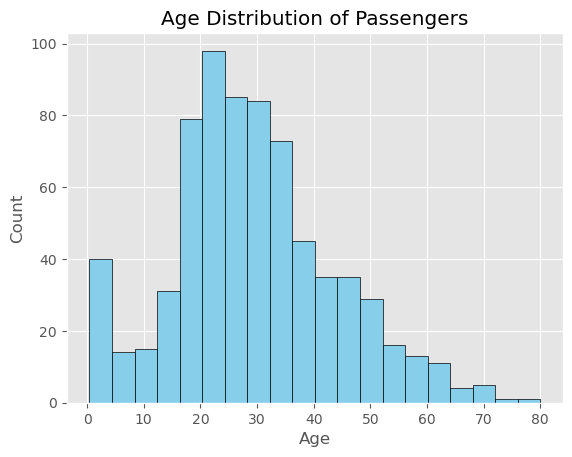

In [8]:
#Setting the style of the plot
plt.style.use('ggplot')

#histogram for the "Age" column
plt.hist(train['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

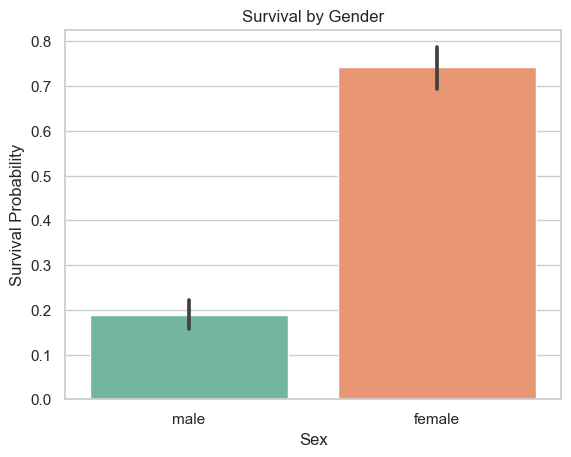

In [9]:
#bar plot for "Sex" vs. "Survived"
sns.set(style="whitegrid")
sns.barplot(x="Sex", y="Survived", data=train, palette="Set2")
plt.title("Survival by Gender")
plt.xlabel("Sex")
plt.ylabel("Survival Probability")
plt.show()

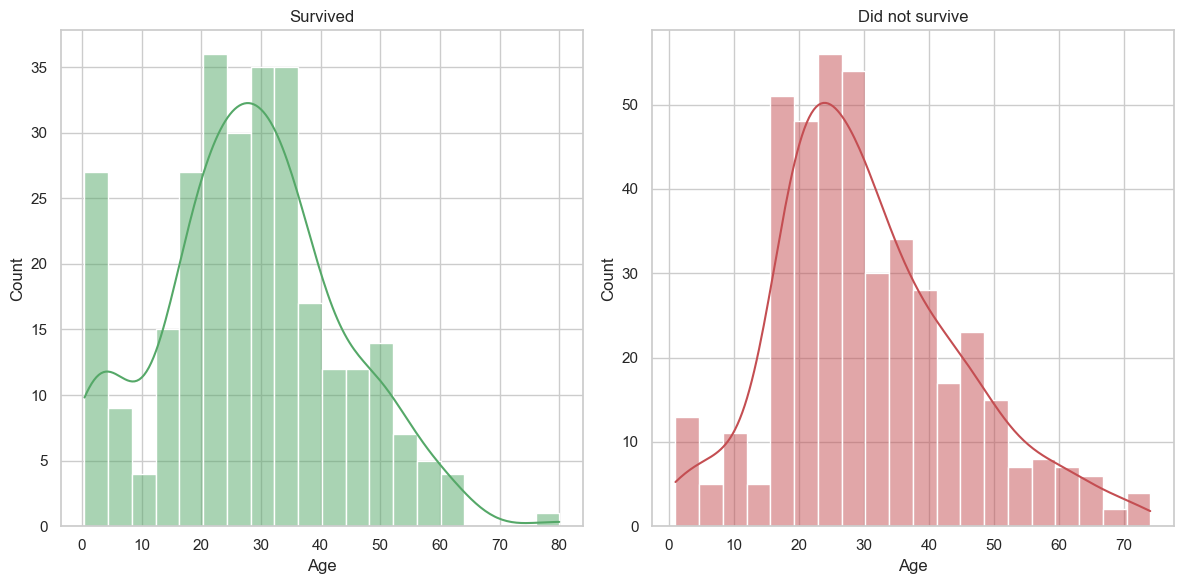

In [10]:
plt.figure(figsize=(12, 6))

#histogram for the age of survivors
plt.subplot(1, 2, 1)
sns.histplot(train[train['Survived'] == 1]['Age'], bins=20, kde=True, color='g')
plt.title("Survived")

#histogram for the age of non-survivors
plt.subplot(1, 2, 2)
sns.histplot(train[train['Survived'] == 0]['Age'], bins=20, kde=True, color='r')
plt.title("Did not survive")

plt.tight_layout()
plt.show()

C:\Users\piyus\AppData\Local\Temp\ipykernel_2720\3506406068.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Embarked", y="Survived", data=train, ci=None, palette="Blues")


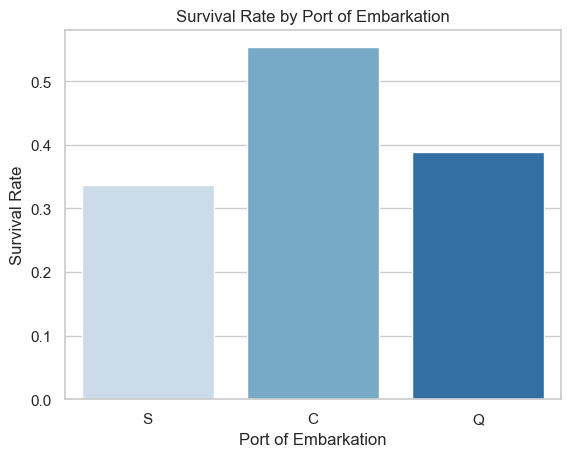

In [11]:
#bar plot for "Embarked" vs. "Survived"
sns.barplot(x="Embarked", y="Survived", data=train, ci=None, palette="Blues")

plt.xlabel("Port of Embarkation")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Port of Embarkation")

plt.show()

In [12]:
#mean age
mean_age = train['Age'].mean()

#Filling the missing age 
train['Age'].fillna(mean_age, inplace=True)

#median age
median_age = train['Age'].median()

# Filling missing age values with the median age
train['Age'].fillna(median_age, inplace=True)


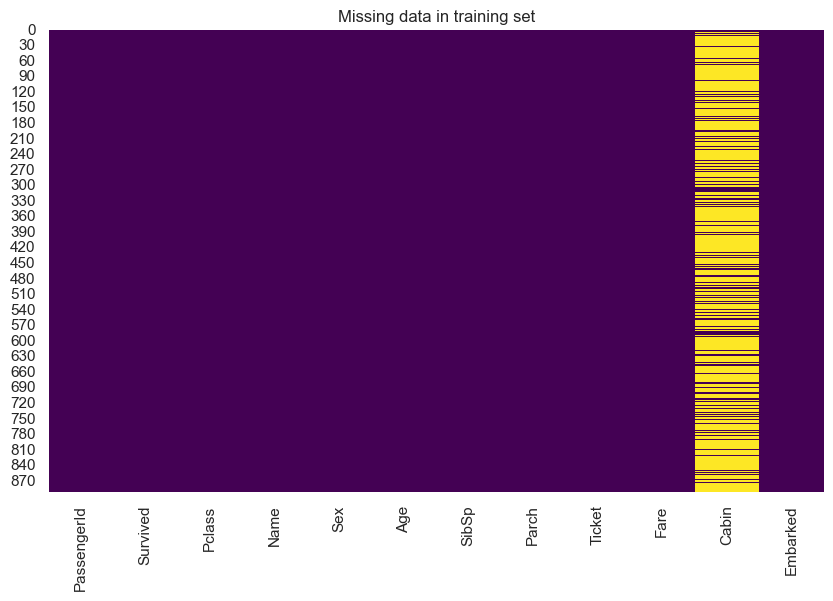

In [13]:
#heatmap for missiing values  
plt.figure(figsize=(10,6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing data in training set')
plt.show()

In [14]:
train.drop('Cabin', axis=1, inplace=True)

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
train.dropna(inplace=True)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [18]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'] , drop_first=True)

In [19]:
train.drop(['Sex' , 'Embarked' , 'Name' , 'Ticket'] , axis=1 , inplace=True)

In [20]:
train = pd.concat([train,sex,embark],axis=1)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [22]:
from sklearn.model_selection import train_test_split

#Defining features (X) and target (y)
X = train.drop("Survived", axis=1)
y = train["Survived"]

#splitting the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
logistic_model = LogisticRegression(max_iter=1000)

In [25]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
y_pred = logistic_model.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       167
           1       0.72      0.73      0.73       100

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267

Confusion Matrix:
 [[139  28]
 [ 27  73]]


In [28]:
from sklearn.tree import DecisionTreeClassifier

#Creating a Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

#Fitting the model on the training data
decision_tree.fit(X_train, y_train)

#Making predictions on the test data
y_pred_decision_tree = decision_tree.predict(X_test)

In [29]:
print(confusion_matrix(y_test , y_pred_decision_tree))

[[128  39]
 [ 33  67]]


In [30]:
print(classification_report(y_test , y_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       167
           1       0.63      0.67      0.65       100

    accuracy                           0.73       267
   macro avg       0.71      0.72      0.72       267
weighted avg       0.73      0.73      0.73       267



In [31]:
from sklearn.ensemble import RandomForestClassifier

#Creating a Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=1000)  

#Fitting the model on the training data
random_forest.fit(X_train, y_train)

#Making predictions on the test data
y_pred_random_forest = random_forest.predict(X_test)

In [32]:
print(confusion_matrix(y_test , y_pred_random_forest))

[[145  22]
 [ 34  66]]


In [33]:
print(classification_report(y_test , y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       167
           1       0.75      0.66      0.70       100

    accuracy                           0.79       267
   macro avg       0.78      0.76      0.77       267
weighted avg       0.79      0.79      0.79       267



In [34]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [35]:
import xgboost as xgb

#Creating an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier()

#Fitting the model on the training data
xgb_classifier.fit(X_train, y_train)

#Making predictions on the test data
y_pred_xgb = xgb_classifier.predict(X_test)

In [36]:
print(confusion_matrix(y_test , y_pred_xgb))

[[146  21]
 [ 34  66]]


In [37]:
print(classification_report(y_test , y_pred_xgb))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       167
           1       0.76      0.66      0.71       100

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

In [39]:
#Loading and preprocessing the data
data = pd.read_csv("C:\\Users\\piyus\\Desktop\\Titanic\\train.csv")
data.drop(['Cabin'], axis=1, inplace=True)
data.dropna(inplace=True)

In [40]:
#Selecting numerical and categorical columns
numerical_cols = ['Age', 'Fare']
categorical_cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

encoder = OneHotEncoder(sparse=False)
X_categorical = encoder.fit_transform(data[categorical_cols])
X = np.hstack((data[numerical_cols], X_categorical))

#Defining the target (y)
y = data['Survived']

C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [41]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
#ANN model
ann = Sequential()
ann.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
ann.add(Dense(units=32, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

In [44]:
#Compiling the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
#Training the model
ann.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1)

Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6536 - accuracy: 0.6406
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5786 - accuracy: 0.7731
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.8072
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.8052
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.8112
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8173
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8153
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8193
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8233
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8193
Epoch 11/50
16/16 [

In [46]:
#Evaluating the model
accuracy = ann.evaluate(X_test, y_test)[1]
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.7757
Accuracy on the test set: 77.57%


In [47]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

7/7 [==============================] - 0s 2ms/step
Confusion Matrix:
[[108  14]
 [ 34  58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       122
           1       0.81      0.63      0.71        92

    accuracy                           0.78       214
   macro avg       0.78      0.76      0.76       214
weighted avg       0.78      0.78      0.77       214

